In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import GRU, Dense

In [2]:
data = pd.read_csv('districtwise-ipc-crimes-2017-onwards.csv')
data

,id,year,state_name,state_code,district_name,district_code,registration_circles,murder,clpbl_hmcrd_not_amt_murder,hit_and_run,...,ofnc_religion,cheating_impersonation,ofnc_mischief,arson,criminal_trespass,crlty_husbnd_relatives,crcl_false_fake_news_rumours,criminal_intimidation,insult_modesty_women,other_ipc_crimes
0,0,2017,Andhra Pradesh,28,Ananthapuramu,502,Anantapur,113,4,50,...,6,4,9,38,198,471,0,139,8,159
1,1,2017,Andhra Pradesh,28,Chittoor,503,Chittoor,70,5,36,...,0,0,4,7,100,212,1,26,12,470
2,2,2017,Andhra Pradesh,28,Y.S.R.,504,Cuddapah,88,10,32,...,0,1,44,68,198,481,0,332,60,447
3,3,2017,Andhra Pradesh,28,East Godavari,505,East Godavari,69,14,138,...,12,0,25,40,848,601,0,50,127,48
4,4,2017,Andhra Pradesh,28,Ananthapuramu,502,Guntakal Railway,11,0,0,...,0,0,0,0,0,1,0,2,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5317,5317,2022,Jammu And Kashmir,1,Srinagar,13,Special Crime Wing Kashmir,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5318,5318,2022,Jammu And Kashmir,1,Srinagar,13,Anti Narcotic Task Force Kashmir,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5319,5319,2022,Jammu And Kashmir,1,Jammu,5,Economic Offences Wing (Eow) Jammu,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5320,5320,2022,Jammu And Kashmir,1,Srinagar,13,Economic Offences Wing (Eow) Kashmir,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data['Total_crimes'] = data[['murder','hit_and_run','ofnc_religion','cheating_impersonation','ofnc_mischief','arson','criminal_trespass','crlty_husbnd_relatives','crcl_false_fake_news_rumours','criminal_intimidation','insult_modesty_women','other_ipc_crimes']].sum(axis=1)

In [7]:
features = ['murder','hit_and_run','ofnc_religion','cheating_impersonation','ofnc_mischief','arson','criminal_trespass','crlty_husbnd_relatives','crcl_false_fake_news_rumours','criminal_intimidation','insult_modesty_women','other_ipc_crimes']
X = data[features]
y = data['Total_crimes']  

In [9]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [15]:
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(GRU(units=50))
model.add(Dense(units=X_train_reshaped.shape[2])) 
model.compile(optimizer='adam', loss='mse')

C:\Users\A S SAI THEJASWINI\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.fit(X_train_reshaped, X_train_scaled, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.8703
Epoch 2/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3228
Epoch 3/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2440
Epoch 4/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1699
Epoch 5/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0941
Epoch 6/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0879
Epoch 7/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0832
Epoch 8/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0771
Epoch 9/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1124
Epoch 10/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0565
Epoch 11/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0487
Epoch 12/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0415
Epoch 13/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0313
Epoch 14/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0373
Epoch 15/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 1

In [18]:
y_pred = model.predict(X_test_reshaped)

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step


In [21]:
y_pred_unscaled = scaler.inverse_transform(y_pred)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
mse = mean_squared_error(X_test, y_pred_unscaled)
r2 = r2_score(X_test, y_pred_unscaled)

In [27]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 5544.547381085657
R-squared: 0.9628999506514235


In [29]:
years = data.groupby('year').sum()
years 

,id,state_name,state_code,district_name,district_code,registration_circles,murder,clpbl_hmcrd_not_amt_murder,hit_and_run,acdnt_other_than_hit_and_run_,...,cheating_impersonation,ofnc_mischief,arson,criminal_trespass,crlty_husbnd_relatives,crcl_false_fake_news_rumours,criminal_intimidation,insult_modesty_women,other_ipc_crimes,Total_crimes
year,,,,,,,,,,,,,,,,,,,,,
2017,555970,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,15056,AnanthapuramuChittoorY.S.R.East GodavariAnanth...,306803,AnantapurChittoorCuddapahEast GodavariGuntakal...,28653,3401,43727,91076,...,601,2626,9186,35343,104551,257,73669,7451,239796,547668
2018,1210666,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,15139,AnanthapuramuChittoorY.S.R.East GodavariAnanth...,308760,AnantapurChittoorCuddapahEast GodavariGuntakal...,29017,3635,47028,88023,...,528,2818,9252,40101,103272,280,94507,6992,222429,558166
2019,1914599,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,15434,AnanthapuramuChittoorY.S.R.East GodavariAnanth...,319791,AnantapurChittoorCuddapahEast GodavariGuntakal...,28918,3470,47530,89057,...,775,2679,8420,39477,125298,476,101422,6939,251455,614848
2020,2688057,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,16009,AnanthapuramuChittoorY.S.R.East GodavariAnanth...,332589,AnantapurChittoorCuddapahEast GodavariGuntakal...,29193,3512,41196,78980,...,585,2796,7615,40818,111549,1527,115297,7065,1062399,1421789
2021,3458561,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,16081,AnanthapuramuChittoorY.S.R.East GodavariAnanth...,334515,AnantapurChittoorCuddapahEast GodavariGuntakal...,29272,3807,43499,93931,...,471,3459,7961,44004,136234,882,123442,7788,496535,895022
2022,4331328,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,16584,ChittoorEast GodavariAnanthapuramuGunturKrishn...,350702,ChittoorEast GodavariGuntakal RailwayGunturKri...,28507,3617,47806,103010,...,692,3440,7798,45228,139664,858,150769,8937,292870,728441


In [31]:
import matplotlib.pyplot as plt

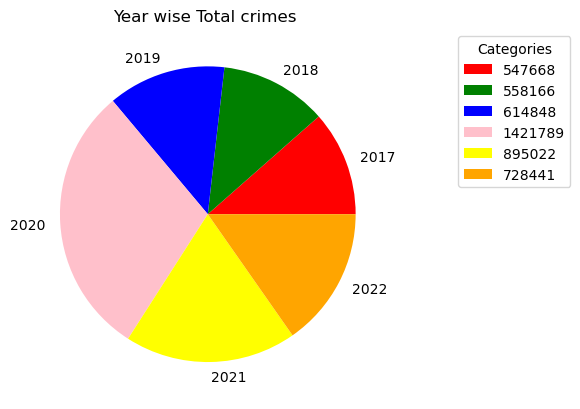

In [33]:
plt.pie(years['Total_crimes'], labels = years.index, colors= ['red','green','blue','pink','yellow','orange'] )
plt.title('Year wise Total crimes ')
plt.legend(labels=years['Total_crimes'].values, title="Categories", loc="upper right",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()